In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()

Loading BokehJS ...

# Vizual identity prep

In [33]:
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here

In [34]:
sbt_palette = [
    "#F26749",  # Crab
    "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#204ECF",  # Deep Ocean
    "#EA9836",  # Butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#B23A1D",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#E5989B",  # Deeper Warm Blush
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#9C4700",  # More Contrasty Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement 
]

# Data prep

In [35]:
filepath = r'ByCompany.csv'
Comp_dk = pd.read_csv(filepath, sep=';')
filepath = r'ByTargets.csv'
Targ_dk = pd.read_csv(filepath, sep=';')

In [36]:
#Targ.info()
#Comp.info()
Targ_dk = Targ_dk.copy()
Comp_dk = Comp_dk.copy()

In [37]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ_dk['sectorCat'] = Targ_dk['sector'].apply(map_category)
Comp_dk['sectorCat'] = Comp_dk['sector'].apply(map_category)
# Display the DataFrame
Targ_dk['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ_dk = Targ_dk[['sector', 'sectorCat'] + [col for col in Targ_dk.columns if col not in ['sector', 'sectorCat']]]
Comp_dk = Comp_dk[['sector', 'sectorCat'] + [col for col in Comp_dk.columns if col not in ['sector', 'sectorCat']]]

## Editing Targ and Comp df

In [38]:
#make Targ['date_published'] a datetime object
Targ_dk['date_published'] = pd.to_datetime(Targ_dk['date_published'], errors='coerce')
#Seperate year from date_published
Targ_dk['Comitted year'] = Targ_dk['date_published'].dt.year
#Sort targ by year
Targ_dk = Targ_dk.sort_values(by='Comitted year', ascending=True)
#Limit to 2015-2024
Targ_dk = Targ_dk[Targ_dk['Comitted year'].between(2015, 2024)]
#Check if year is sorted correctly
Targ_dk['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [39]:
Targ_dk['scope'] = Targ_dk['scope'].replace({'300%': '3', '200%': '2', '100%': '1'})

In [40]:
Comp_dk['date_updated'] = pd.to_datetime(Comp_dk['date_updated'], errors='coerce')
#isolating year in Comp
Comp_dk['year_updated'] = Comp_dk['date_updated'].dt.year
Comp_dk=Comp_dk.sort_values(by='year_updated', ascending=True)
Comp_dk = Comp_dk[Comp_dk['year_updated'].between(2015, 2024)]
#Check if year is sorted correctly
Comp_dk['year_updated'].unique()

C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_30916\2890173163.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp_dk['date_updated'] = pd.to_datetime(Comp_dk['date_updated'], errors='coerce')


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

# Prep of DK data

In [41]:
#create dataframe with only locations with denmark
Targ_dk = Targ_dk[Targ_dk['location'].str.contains('Denmark', na=False)]
Comp_dk = Comp_dk[Comp_dk['location'].str.contains('Denmark', na=False)]


# skal mulighvis ikke bruge

In [42]:
# Remove duplicates of stbi_id in Targ to make counting easier
#Targ_dk_cleaned = Targ_dk.drop_duplicates(subset=['sbti_id'], keep='first')

# Viz of DK data

In [43]:
Comp_dk

,sector,sectorCat,sbti_id,company_name,organization_type,location,region,near_term_status,near_term_target_classification,near_term_target_year,...,long_term_target_year,net_zero_status,net_zero_year,reason_for_extension_or_removal,date_updated,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,year_updated
866,Food and Beverage Processing,Food and Beverage,40000306,Carlsberg Group,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,Commitment removed,NaN,Expired commitment,2019-12-01,NaN,NaN,NaN,NaN,2019
4365,Building Products,Construction,40007771,The VELUX Group,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2020-09-10,NaN,NaN,NaN,NaN,2020
4630,Electrical Equipment and Machinery,Manufacturing,40011359,Vestas Wind Systems,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,Commitment removed,NaN,Expired commitment,2020-12-01,NaN,NaN,NaN,NaN,2020
3652,Building Products,Construction,40010558,Rockwool Group,Corporate,Denmark,Europe,Targets set,Well-below 2°C,2034,...,NaN,NaN,NaN,NaN,2020-12-10,NaN,NaN,NaN,NaN,2020
1082,Food and Staples Retailing,Retail,40002421,Coop amba,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2021-12-09,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,"Hotels, Restaurants and Leisure, and Tourism S...",Hospitality,40005995,TIVOLI A/S,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-07-25,NaN,NaN,NaN,NaN,2024
6815,Professional Services,Professional Services,40012345,Kromann Reumert I/S,Corporate,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-08-08,NaN,NaN,NaN,NaN,2024
7235,Professional Services,Professional Services,40003500,HUMANIZER A/S,SME,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-01-11,NaN,NaN,NaN,NaN,2024
7232,"Consumer Durables, Household and Personal Prod...",Consumer Products,40013965,Dk International Interior A/S,SME,Denmark,Europe,Targets set,1.5°C,2030,...,NaN,NaN,NaN,NaN,2024-01-11,NaN,NaN,NaN,NaN,2024


# Analysis of Danish companies comitted to SBTi
In this section Anja's graphs are created


In [44]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
org = Comp_dk[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in org.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
org_growth = org_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count') 


In [45]:
# Creating dataset consisting of only the companies with "Commitment removed" in any of the status columns
# Drop the unnecessary columns first
#prep = Comp_dk.drop(columns=['region', 'sector','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']).reset_index(drop=True)

# Define the columns to check for "Commitment removed"
#status_cols = ["near_term_status", "long_term_status", " net_zero_status"]

# Create a mask for rows where any of the status columns contain "Commitment removed"
#mask = prep[status_cols].apply(lambda row: "Commitment removed" in row.values, axis=1)

# Use the mask to filter the full rows
#retr = prep[mask].reset_index(drop=True)


In [46]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
prep = Comp_dk.drop(columns=['region', 'sector','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']).reset_index(drop=True)
# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in prep.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Commitment removed" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
retr_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
retr_growth = retr_sorted.groupby(['organization_type', 'year_updated']).size().reset_index(name='count', drop=False) 
#sort retr_growth by year
retr_growth = retr_growth.sort_values(by='year_updated', ascending=True)

In [47]:
retr_growth_2=retr_growth.groupby('year_updated')['count'].sum().sort_index()
# Calculate cumulative sum
cum_retr_growth = retr_growth_2.cumsum().reset_index()
# Rename columns for clarity
cum_retr_growth.columns = ['year', 'cumulative_count']

#print(cum_retr_growth)

org_growth_2=org_growth.groupby('year_updated')['count'].sum().sort_index()
# Calculate cumulative sum
cum_org_growth = org_growth_2.cumsum().reset_index()
# Rename columns for clarity
cum_org_growth.columns = ['year', 'cumulative_count']

#print(cum_org_growth)

# Align the indices of both DataFrames
aligned_data = pd.merge(
    cum_org_growth, 
    cum_retr_growth, 
    on='year', 
    how='left', 
    suffixes=('_org', '_retr')
).fillna(0)  # Fill missing values with 0 for alignment
print(aligned_data)

   year  cumulative_count_org  cumulative_count_retr
0  2019                     1                    1.0
1  2020                     4                    2.0
2  2021                    15                    5.0
3  2022                    66                   11.0
4  2023                   132                   15.0
5  2024                   211                    0.0


In [48]:
# remove 2024 from aligned_data
aligned_data_prog = aligned_data[aligned_data['year'] != 2024]
X = np.array(aligned_data_prog['year']).reshape(-1, 1)
y = np.array(aligned_data_prog['cumulative_count_retr'])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_pred_2024 = poly_model.predict(poly.transform([[2024]]))[0]

print(f"Polynomial prediction for 2024: {poly_pred_2024:.1f}")

Polynomial prediction for 2024: 22.4


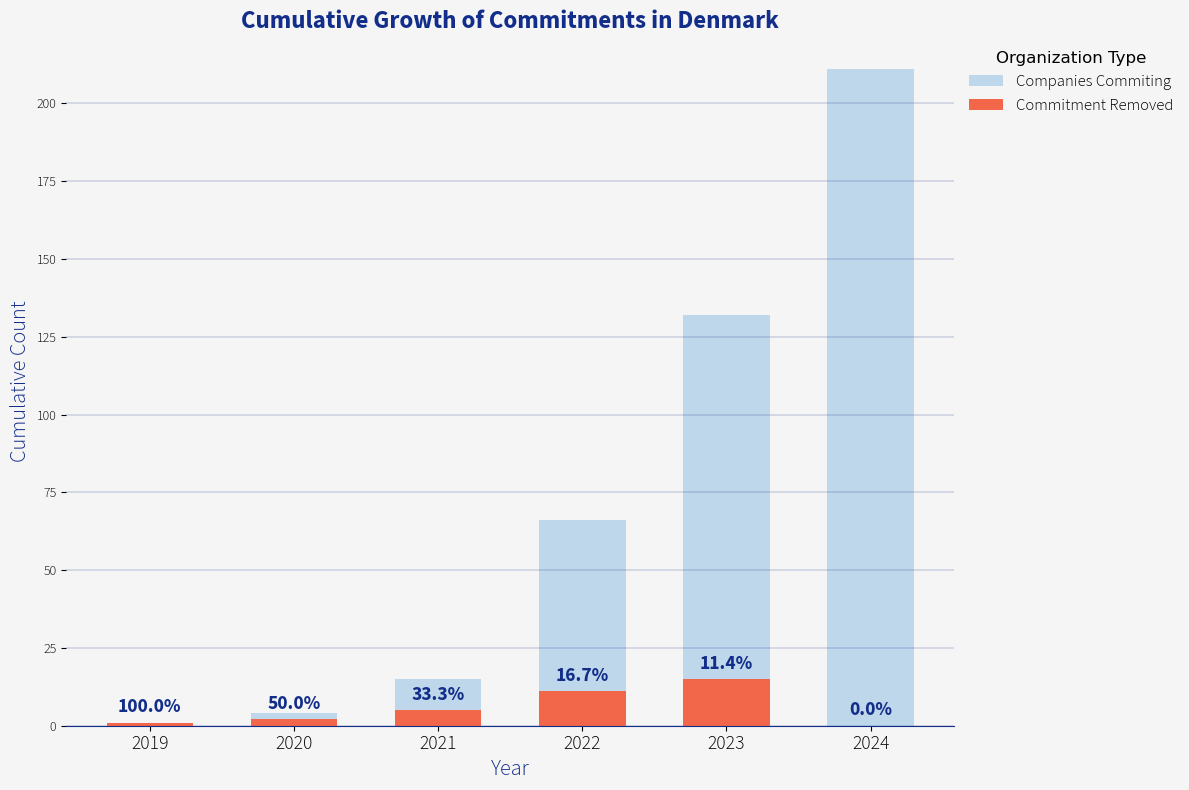

In [49]:
# Replace with your palette if needed
retr_palette = ['#BFD7EA', '#F26749']  # light gray-blue for background, dark blue for foreground

# --- Data and bar setup ---
years = aligned_data['year']
x = np.arange(len(years))

width_bg = 0.6
width_fg = 0.6
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set background

# --- Plot bars ---
# Background: All orgs
ax.bar(
    x,
    aligned_data['cumulative_count_org'],
    width=width_bg,
    color=retr_palette[0],
    label='Companies Commiting',
    zorder=1
)

# Foreground: Commitment removed
bars = ax.bar(
    x,
    aligned_data['cumulative_count_retr'],
    width=width_fg,
    color=retr_palette[1],
    label='Commitment Removed',
    zorder=2
)

# --- Labeling ---
ax.set_facecolor("#f5f5f5")
ax.set_xticks(x)
ax.set_xticklabels(years, fontproperties=font_light, fontsize=14)
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_ylabel("Cumulative Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_title("Cumulative Growth of Commitments in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")

ax.tick_params(axis='y', labelsize=14)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

for i, bar in enumerate(bars):
    retr = bar.get_height()
    total = aligned_data['cumulative_count_org'].iloc[i]
    if total > 0:
        percent = (retr / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            retr + 2,  # slightly above the bar
            f'{percent:.1f}%',  # e.g., 12.3%
            ha='center',
            va='bottom',
            fontsize=14,
            color="#122E8A",
            fontproperties=font_bold
        )

# --- Grid and spines ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# --- Legend ---
ax.legend(
    title="Organization Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()


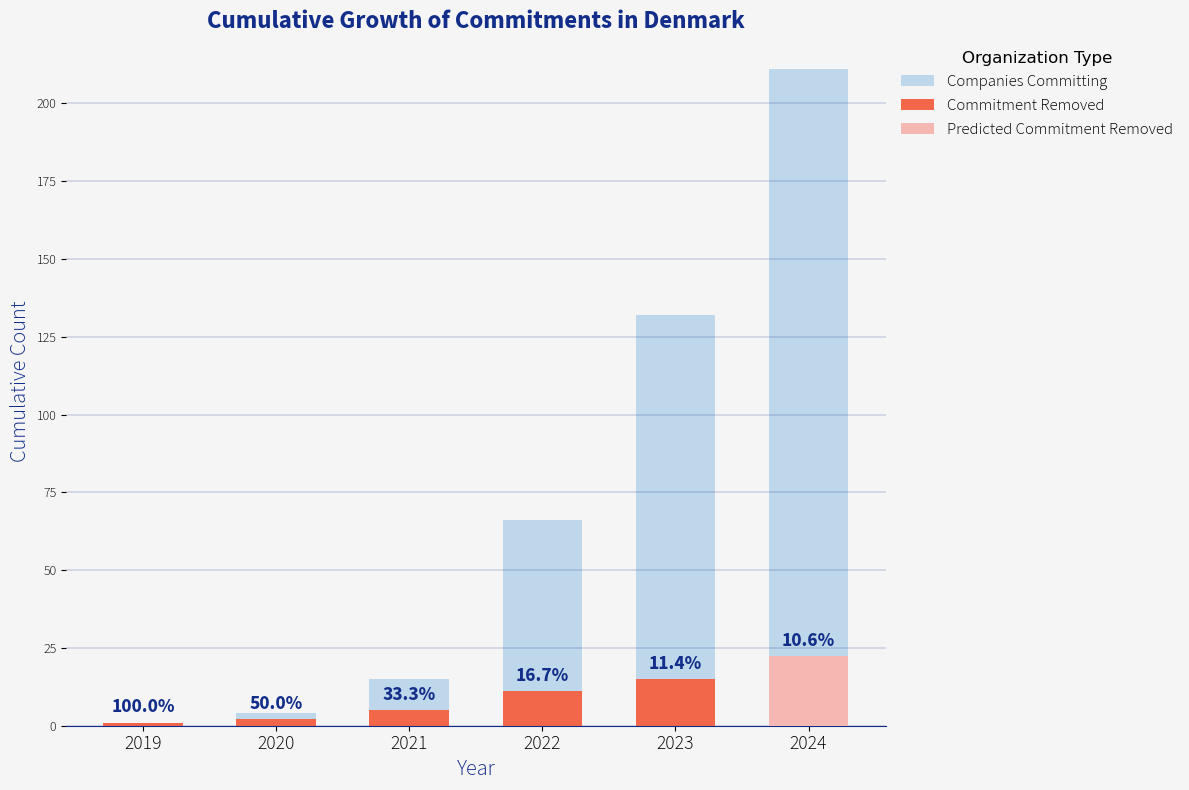

In [50]:
# -- Plotting --

retr_palette = ['#BFD7EA', '#F26749']  # orgs + actual removed
predicted_color = '#F5B7B1'  # orange for prediction

years = aligned_data['year']
x = np.arange(len(years))

width_bg = 0.6
width_fg = 0.6
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))

# Background: All organizations
ax.bar(
    x,
    aligned_data['cumulative_count_org'],
    width=width_bg,
    color=retr_palette[0],
    label='Companies Committing',
    zorder=1
)

# Foreground: Actual commitment removed
bars = ax.bar(
    x,
    aligned_data['cumulative_count_retr'],
    width=width_fg,
    color=retr_palette[1],
    label='Commitment Removed',
    zorder=2
)

# Prediction for 2024
predicted_year = 2024
predicted_retr = poly_pred_2024
predicted_org = aligned_data[aligned_data['year'] == predicted_year]['cumulative_count_org'].values[0]
x_pred = len(years) - 1  # index for 2024

# Add predicted bar
pred_bar = ax.bar(
    x_pred,
    predicted_retr,
    width=width_fg,
    color=predicted_color,
    label='Predicted Commitment Removed',
    zorder=3
)

# Add percentage label above all bars
for i, bar in enumerate(bars):
    retr = bar.get_height()
    total = aligned_data['cumulative_count_org'].iloc[i]
    
    # Skip 2024's actual retr bar if it's 0 (we're adding a prediction instead)
    if aligned_data['year'].iloc[i] == predicted_year and retr == 0:
        continue

    if total > 0:
        percent = (retr / total) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            retr + 2,
            f'{percent:.1f}%',
            ha='center',
            va='bottom',
            fontsize=14,
            color="#122E8A",
            fontproperties=font_bold
        )

# Add label for predicted bar
if predicted_org > 0:
    pred_percent = (predicted_retr / predicted_org) * 100
    ax.text(
        x_pred,
        predicted_retr + 2,
        f'{pred_percent:.1f}%',
        ha='center',
        va='bottom',
        fontsize=14,
        color="#122E8A",
        fontproperties=font_bold
    )

# Axis labels, title, ticks
ax.set_facecolor("#f5f5f5")
ax.set_xticks(x)
ax.set_xticklabels(years, fontproperties=font_light, fontsize=14)
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_ylabel("Cumulative Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_title("Cumulative Growth of Commitments in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.tick_params(axis='y', labelsize=14)

# Y-axis font
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Grid and spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Legend
ax.legend(
    title="Organization Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()


In [55]:
# Creating dataset consisting of only the companies with "Commitment removed" in any of the status columns
# Drop the unnecessary columns first
prep = Comp_dk.drop(columns=['region', 'sector','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']).reset_index(drop=True)

# Define the columns to check for "Commitment removed"
status_cols = ["near_term_status", "long_term_status", " net_zero_status"]

# Create a mask for rows where any of the status columns contain "Commitment removed"
mask = prep[status_cols].apply(lambda row: "Commitment removed" in row.values, axis=1)

# Use the mask to filter the full rows
retr = prep[mask].reset_index(drop=True)

In [52]:
retr

,sectorCat,sbti_id,company_name,organization_type,location,near_term_status,near_term_target_classification,near_term_target_year,long_term_status,long_term_target_classification,long_term_target_year,net_zero_status,net_zero_year,reason_for_extension_or_removal,date_updated,year_updated
0,Food and Beverage,40000306,Carlsberg Group,Corporate,Denmark,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2019-12-01,2019
1,Manufacturing,40011359,Vestas Wind Systems,Corporate,Denmark,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2020-12-01,2020
2,Unknown,40010492,Jupiter Bach,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Expired commitment,2021-03-18,2021
3,Consumer Products,40003996,LTP Group A/S,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Expired commitment,2021-09-22,2021
4,Food and Beverage,40000101,Stryhns AS,Corporate,Denmark,Targets set,1.5°C,2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2021-12-16,2021
5,Construction,40010385,SM Industries,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2022-07-14,2022
6,Utilities,40012201,REMONDIS A/S,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2022-10-20,2022
7,Consumer Products,40009508,Micro Matic A/S,Corporate,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Expired commitment,2022-09-01,2022
8,Financial Services,40012437,Merkur Andelskasse,Financial Institution,Denmark,Commitment removed,NaN,NaN,NaN,NaN,NaN,Commitment removed,NaN,Withdrawn commitment,2022-01-15,2022
9,Retail,40014134,STARK Group,Corporate,Denmark,Targets set,1.5°C,FY2030,NaN,NaN,NaN,Commitment removed,NaN,Expired commitment,2022-02-17,2022


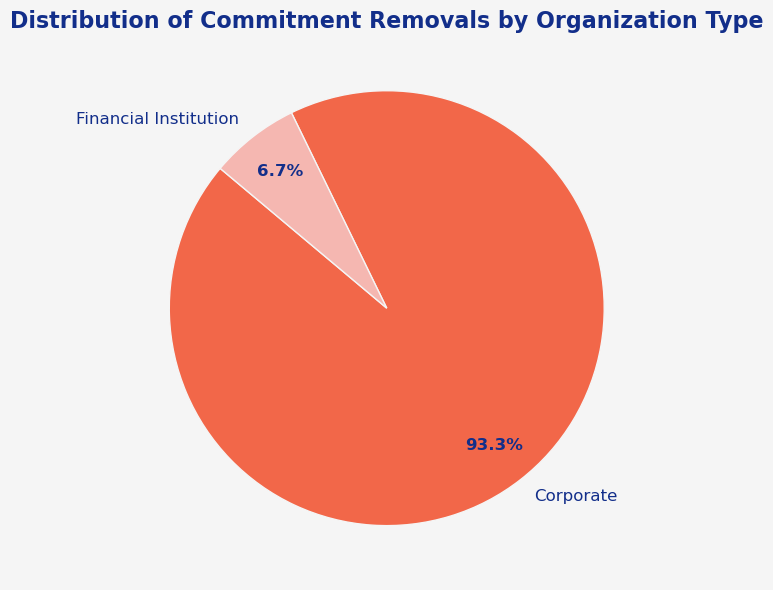

In [66]:
# Group by 'organization_type' and 'year_updated' and count the occurrences
retr_types = retr.groupby(['organization_type', 'year_updated']).size().reset_index(name='count')
retr_type_counts = retr_types.groupby("organization_type")["count"].sum()

values = org_type_counts.values.tolist()
labels = org_type_counts.index.tolist()

fig, ax = plt.subplots(figsize=(14, 6), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=sbt_palette[:len(labels)],
    textprops={'color': "#122E8A", 'fontsize': 12},
    wedgeprops={'edgecolor': '#f5f5f5'},
    pctdistance=0.80
)

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color("#122E8A")
    autotext.set_size(12)

ax.set_title(
    'Distribution of Commitment Removals by Organization Type',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

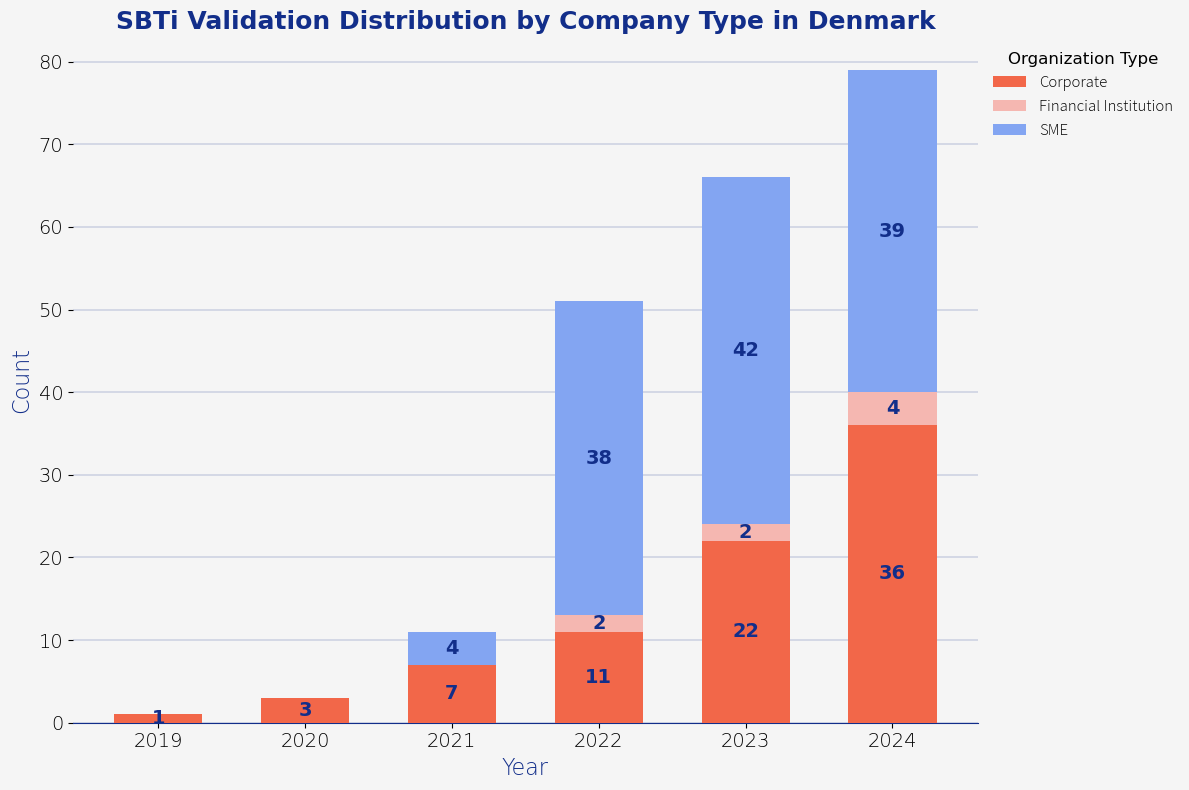

In [61]:
# Pivot the data to prepare it for stacked bar plotting
pivot_data = org_growth.pivot(index="year_updated", columns="organization_type", values="count").fillna(0)

# Sort by year
pivot_data = pivot_data.sort_index()

# Plot background color and bar color
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set fixed plot size (width, height)

# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Plot stacked bars
bottom_vals = None
for i, col in enumerate(pivot_data.columns):
    if bottom_vals is None:
        bars = ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
        bottom_vals = pivot_data[col]
    else:
        ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation Distribution by Company Type in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_height())}', 
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here


# Add legend
ax.legend(
    title="Organization Type", 
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    frameon=False, 
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

# Industires in denmark

In [25]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
sect = Comp_dk[['sectorCat', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows = []

# Loop through the rows of the dataset
for index, row in sect.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows.append({
            "sectorCat": row["sectorCat"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
sect_sorted = pd.DataFrame(rows)

#count the number of companies within each organisational type with validated targets 
sect_growth = sect_sorted.groupby(['sectorCat', 'year_updated']).size().reset_index(name='count') 

# Calculate cumulative sum
sect_cumsum = (
    sect_growth
    .sort_values(by=['sectorCat', 'year_updated'])  # Ensure data is sorted by sector and year
    .groupby('sectorCat', as_index=False)  # Group by sector
    .apply(lambda x: x.assign(cumsum_count=x['count'].cumsum()))  # Add cumulative sum column
    .reset_index(drop=True)  # Reset index for a clean dataframe
)

# Display the result
print(sect_cumsum)



              sectorCat  year_updated  count  cumsum_count
0            Automotive          2022      1             1
1            Automotive          2023      1             2
2             Chemicals          2022      5             5
3             Chemicals          2023      2             7
4   Commercial Services          2022      3             3
..                  ...           ...    ...           ...
57       Transportation          2023      1             2
58       Transportation          2024      4             6
59              Unknown          2023      1             1
60            Utilities          2023      1             1
61            Utilities          2024      1             2

[62 rows x 4 columns]


C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_28156\4042570129.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(cumsum_count=x['count'].cumsum()))  # Add cumulative sum column


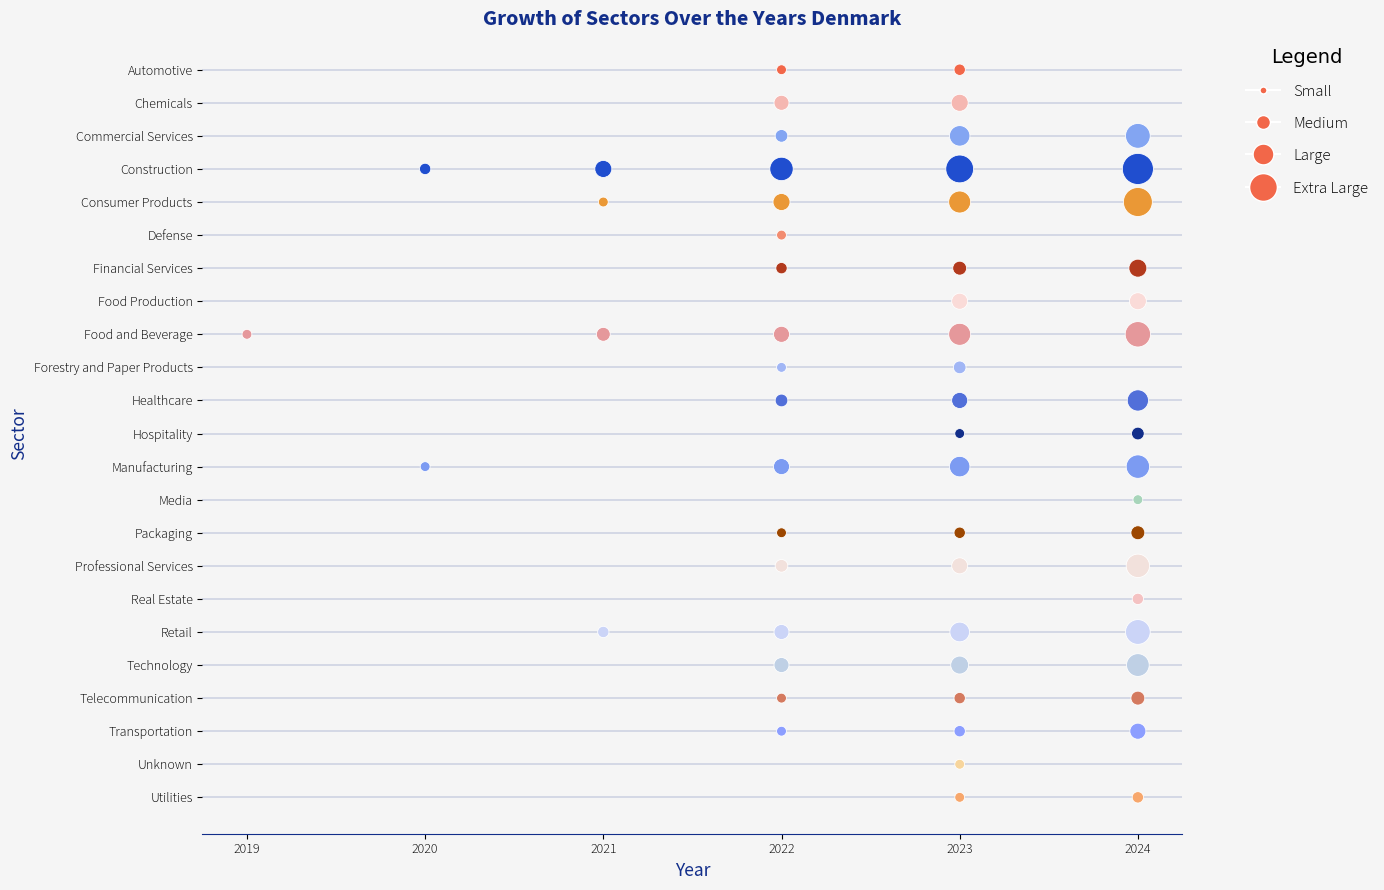

In [26]:
unique_sectors = sect_cumsum["sectorCat"].unique()
color_map = dict(zip(unique_sectors, sbt_palette[:len(unique_sectors)]))

# Create the plot
fig, ax = plt.subplots(figsize=(14, 9), facecolor="#f5f5f5")
ax.set_facecolor("#f5f5f5")

# Bubble scatterplot without default legend
bubble_plot = sns.scatterplot(
    data=sect_cumsum,
    x="year_updated",
    y="sectorCat",
    size="cumsum_count",  # Bubble size based on count
    hue="sectorCat",  # Differentiate by sector category
    palette=color_map,  # Use your custom palette
    sizes=(50, 500),
    alpha=1,
    ax=ax,
    legend=False,  # Disable the default legend
    zorder=2  # Ensure bubbles are drawn above other elements
)

# Horizontal gridlines
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)  # Gridlines are behind the bubbles

# Titles and labels
bubble_plot.set_title("Growth of Sectors Over the Years Denmark", fontproperties=font_bold, fontsize=16, fontweight='bold', color="#122E8A")
bubble_plot.set_xlabel("Year", fontproperties=font_reg, fontsize=14, color="#122E8A")
bubble_plot.set_ylabel("Sector", fontproperties=font_reg, fontsize=14, color="#122E8A")

# Tick styling
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=1)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Create a custom legend with specific colors using Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor="#F26749", markersize=5, label="Small"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor="#F26749", markersize=10, label="Medium"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor="#F26749", markersize=15, label="Large"),
    Line2D([0], [0], marker='o', color='w', markerfacecolor="#F26749", markersize=20, label="Extra Large"),
]

# Add the custom legend to the plot
ax.legend(
    handles=legend_elements,
    title="Legend",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12,
    frameon=False,
    prop=font_legend,
    labelspacing=1,
    title_fontsize=14
)

# Spines cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")

plt.tight_layout()
plt.show()

In [27]:
sbt_palette2 = [
    "#F26749",  # Crab
    "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#EA9836",  # Butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#6C8EDB",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#7ED9A0",  # greeb
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#9C4700",  # More Contrasty Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement
]

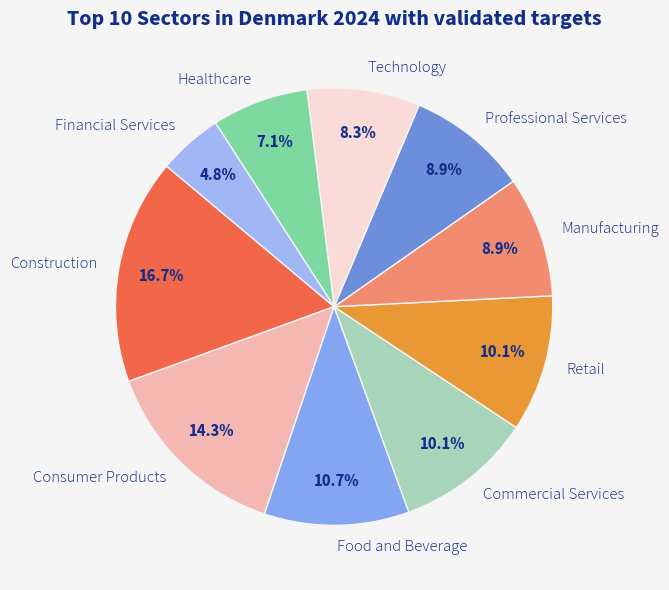

In [28]:
# Filter for the year 2024
sect_2024 = sect_cumsum[sect_cumsum['year_updated'] == 2024]

# Sort by cumsum_count in descending order and select the top 10 sectors
top_10_sectors = sect_2024.sort_values(by='cumsum_count', ascending=False).head(10)

# Create the pie chart with enhanced design
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#f5f5f5")  # Set figure background color
ax.set_facecolor("#f5f5f5")  # Set axes background color

# Use sbt_palette for the pie chart colors
colors = sbt_palette2[:len(top_10_sectors)]

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    top_10_sectors['cumsum_count'],  # Values for the pie chart
    labels=top_10_sectors['sectorCat'],  # Labels for each sector
    autopct='%1.1f%%',  # Display percentage
    startangle=140,  # Start angle for better visibility
    colors=colors,  # Use custom palette
    textprops={'color': "#122E8A", 'fontproperties': font_light,'fontsize': 12},  # Style for labels
    wedgeprops={'edgecolor': '#f5f5f5'}, # Add a border to pie slices
    pctdistance=0.80   # Distance of percentage text from the center
)

# Style the percentages displayed on the pie chart
for autotext in autotexts:
    autotext.set_fontproperties(font_bold)  # Use bold font for percentages
    autotext.set_color("#122E8A")  # Set text color
    autotext.set_size(12)  # Adjust font size

# Set the title with font properties
ax.set_title('Top 10 Sectors in Denmark 2024 with validated targets', fontproperties=font_bold, fontsize=16, fontweight='bold', color="#122E8A")

# Remove spines for a clean look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [29]:
Targ_dk['location'].count()

483

In [30]:
scope = Targ_dk[['sectorCat', 'company_name', 'scope', 'Comitted year']].reset_index(drop=True)
#split values in scope column by '+'
scope['scope'] = scope['scope'].str.split('+')
scope_expl=scope.explode('scope')
scope_expl['scope'] = scope_expl['scope'].str.strip()  # Remove leading/trailing whitespace

scope_24=scope_expl[scope_expl['Comitted year'] == 2024]

scope24_count=scope_24['scope'].value_counts()
scope_24['scope'].unique()


array(['1', '2', '3'], dtype=object)

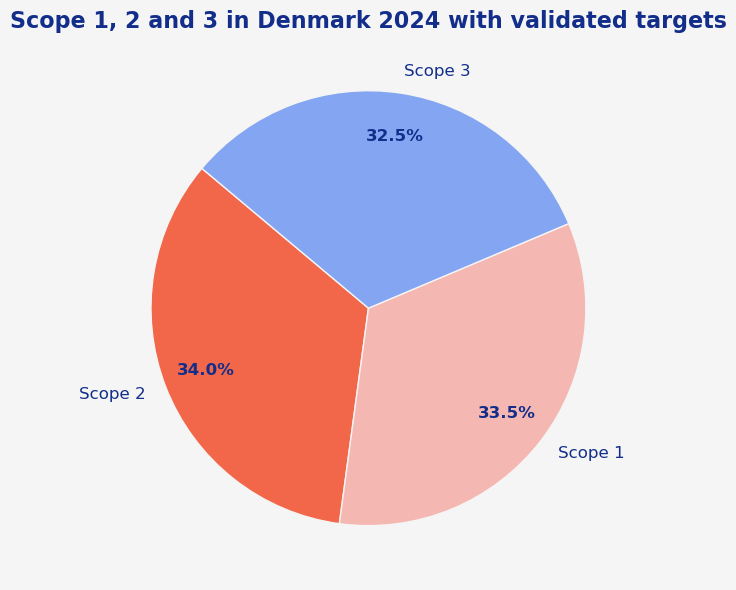

In [31]:
# Create a pie chart with enhanced design
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#f5f5f5")  # Set figure background color
ax.set_facecolor("#f5f5f5")  # Set axes background color

# Prepare data and labels
values = scope24_count.values.tolist()  # Convert to a list
labels = [f"Scope {key}" for key in scope24_count.index]  # Use index for keys

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    values,  # Values for the pie chart
    labels=labels,  # Labels for each scope
    autopct='%1.1f%%',  # Display percentages
    startangle=140,  # Start angle for better visibility
    colors=sbt_palette,  # Use custom palette
    textprops={'color': "#122E8A", 'fontsize': 12},  # Style for labels
    wedgeprops={'edgecolor': '#f5f5f5'},  # Add a border to pie slices
    pctdistance=0.80  # Distance of percentage text from the center
)

# Style the percentages displayed on the pie chart
for autotext in autotexts:
    autotext.set_fontweight('bold')  # Use bold font for percentages
    autotext.set_color("#122E8A")  # Set text color
    autotext.set_size(12)  # Adjust font size

# Set the title with font properties
ax.set_title(
    'Scope 1, 2 and 3 in Denmark 2024 with validated targets',
    fontsize=16,
    fontweight='bold',
    color="#122E8A"
)

# Remove spines for a clean look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

In [32]:
scope_expl['scope'].unique()

array(['1', '2', '3'], dtype=object)

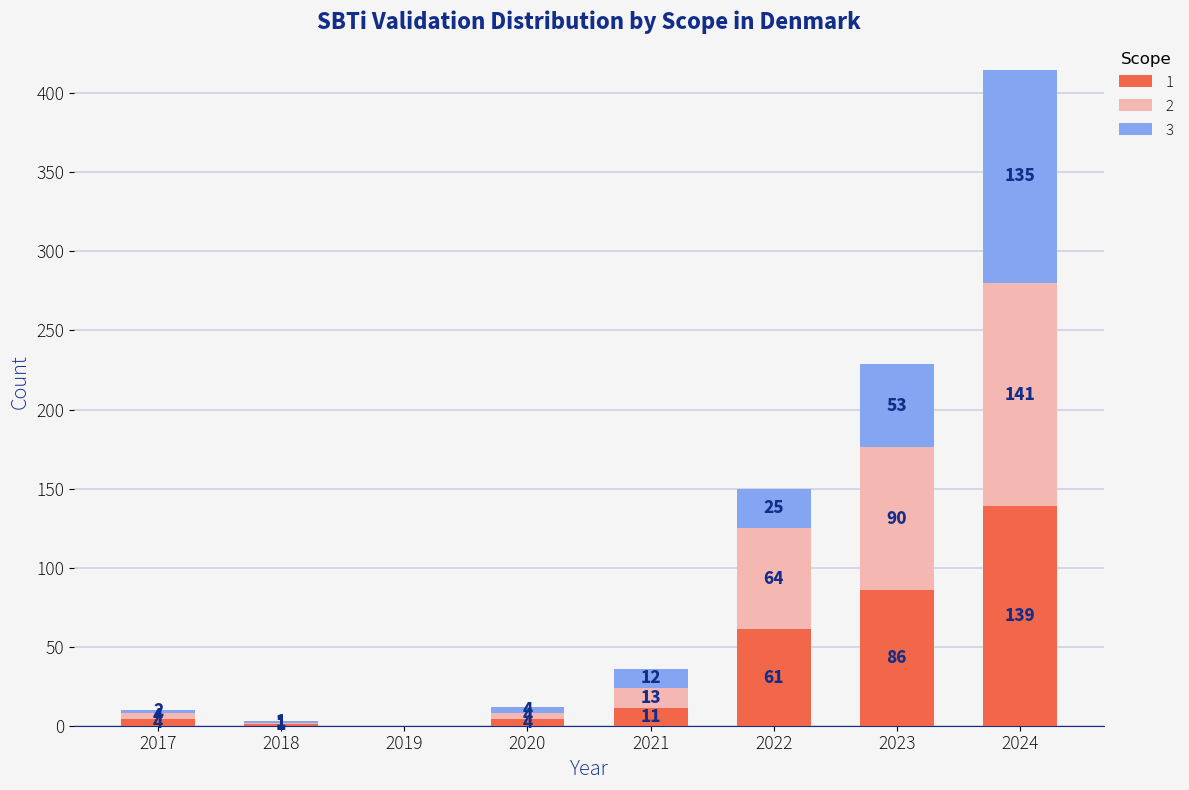

In [33]:
# group by scope and year and count the number of companies with validated targets
scope_explore = scope_expl.groupby(['scope', 'Comitted year']).size().reset_index(name='count')
# Create a pivot table for better visualization
scope_explore_pivot = scope_explore.pivot(index='Comitted year', columns='scope', values='count').fillna(0)
# Sort by year
scope_explore_pivot = scope_explore_pivot.sort_index()
# Plot background color and bar color
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 8))  # Set fixed plot size (width, height)
# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)
# Plot stacked bars
bottom_vals = None
for i, col in enumerate(scope_explore_pivot.columns):
    if bottom_vals is None:
        bars = ax.bar(scope_explore_pivot.index, scope_explore_pivot[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
        bottom_vals = scope_explore_pivot[col]
    else:
        ax.bar(scope_explore_pivot.index, scope_explore_pivot[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
        bottom_vals += scope_explore_pivot[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")
# Set title with font properties
ax.set_title("SBTi Validation Distribution by Scope in Denmark", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)
# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_height())}', 
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )
# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here
# Add legend
ax.legend(
    title="Scope", 
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    frameon=False, 
    prop=font_legend,
    title_fontsize=12
)
plt.tight_layout()
plt.show()

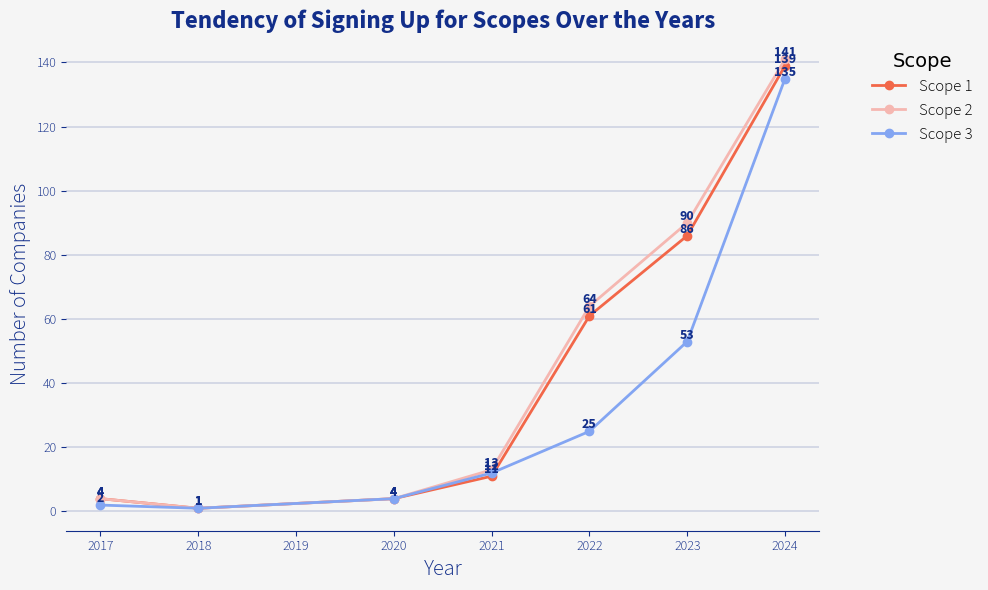

In [34]:
scope_trend=scope_expl.groupby(['Comitted year','scope']).size().reset_index(name='count')
# Create a pivot table to prepare data for the line plot
trend_pivot = scope_trend.pivot(index='Comitted year', columns='scope', values='count')
trend_pivot = trend_pivot.fillna(0)

# Create the plot
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(10, 6))  # Set fixed plot size (width, height)
ax.set_facecolor("#f5f5f5")  # Set axes background color

# Plot each scope as a separate line
for idx, scope in enumerate(trend_pivot.columns):
    ax.plot(
        trend_pivot.index, 
        trend_pivot[scope], 
        label=f'Scope {scope}', 
        color=sbt_palette[idx], 
        marker='o', 
        linewidth=2
    )

# Add title and axis labels
ax.set_title("Tendency of Signing Up for Scopes Over the Years", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Number of Companies", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")

# Style the ticks
ax.tick_params(axis='x', labelsize=14, colors="#122E8A")
ax.tick_params(axis='y', labelsize=12, colors="#122E8A")
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Add data labels for each point on the line
for scope in trend_pivot.columns:
    for x, y in zip(trend_pivot.index, trend_pivot[scope]):
        ax.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color="#122E8A", fontproperties=font_bold)

# Add legend
ax.legend(
    title="Scope",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12,
    frameon=False,
    prop=font_legend,
    title_fontsize=14
)
# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

plt.tight_layout()
plt.show()

In [35]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
import pandas as pd

# Create a pivot table
trend_pivot = scope_trend.pivot(index='Comitted year', columns='scope', values='count').fillna(0)

# Prepare ColumnDataSource for Bokeh
years = list(trend_pivot.index)
source = ColumnDataSource(data={
    'year': years,
    **{f'Scope {col}': trend_pivot[col].values for col in trend_pivot.columns}
})

# Create a Bokeh figure
p = figure(
    title="Tendency of Signing Up for Scopes Over the Years",
    x_axis_label="Year",
    y_axis_label="Number of Companies",
    width=800,
    height=500,
    background_fill_color="#f5f5f5",
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add lines for each scope
colors = sbt_palette[:len(trend_pivot.columns)]  # Ensure we get the correct number of colors
for idx, (scope, color) in enumerate(zip(trend_pivot.columns, colors)):
    scope_label = f"Scope {scope}"
    p.line(
        x='year',
        y=scope_label,
        source=source,
        line_width=2,
        color=color,
        legend_label=scope_label
    )
    p.scatter(
        x='year',
        y=scope_label,
        source=source,
        size=8,
        color=color,
        legend_label=scope_label
    )

# Style the plot
p.title.text_font_size = "18pt"
p.title.text_color = "#122E8A"
p.xaxis.axis_label_text_color = "#122E8A"
p.yaxis.axis_label_text_color = "#122E8A"
p.xaxis.major_label_text_color = "#122E8A"
p.yaxis.major_label_text_color = "#122E8A"
p.legend.label_text_font_size = "12pt"
p.legend.title = "Scopes"
p.legend.title_text_font_size = "14pt"
p.legend.title_text_color = "#122E8A"
p.legend.location = "top_left"
p.legend.background_fill_color = "#f5f5f5"
p.legend.border_line_color = None

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ("Year", "@year"),
    ("Count", "$y")
]
p.add_tools(hover)

# Show the plot
output_notebook()  # If using Jupyter Notebook
show(p)

Loading BokehJS ...

In [36]:
scope_expl_24 = scope_expl[scope_expl['Comitted year'] == 2024]
scope_expl_24=scope_expl_24[['sectorCat', 'scope']].reset_index(drop=True)

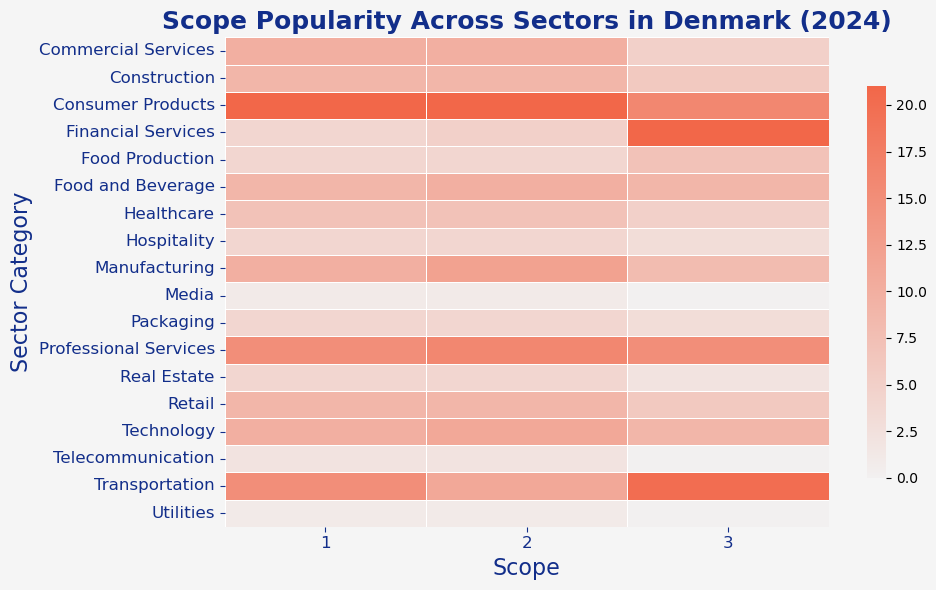

In [37]:
from matplotlib.colors import LinearSegmentedColormap
# Sample data (replace this with your actual DataFrame)
# Create a pivot table for the heatmap
pivot_table = scope_expl_24.pivot_table(index='sectorCat', columns='scope', aggfunc='size', fill_value=0)

# Set a custom color palette
custom_cmap = sns.light_palette("#F26749", as_cmap=True)
#custom_cmap = LinearSegmentedColormap.from_list("CustomSBT", sbt_palette)

# Plot the heatmap with the desired style
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(10, 6))  # Adjust figure size
sns.heatmap(
    pivot_table,
    cmap=custom_cmap,
    #annot=True,  # Display counts
    fmt='d',  # Integer format
    linewidths=0.5,
    linecolor="#FFFFFF",
    cbar_kws={'shrink': 0.8},
    ax=ax
)

# Customize the title and labels
ax.set_title("Scope Popularity Across Sectors in Denmark (2024)", fontsize=18, fontweight='bold', color="#122E8A")
ax.set_xlabel("Scope", fontsize=16, color="#122E8A")
ax.set_ylabel("Sector Category", fontsize=16, color="#122E8A")

# Customize the spines and ticks
ax.tick_params(axis='x', labelsize=12, colors="#122E8A")
ax.tick_params(axis='y', labelsize=12, colors="#122E8A")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
import plotly.express as px

# Create the interactive heatmap using Plotly
fig = px.imshow(
    pivot_table,  # Your pivot_table data
    labels=dict(x="Scope", y="Sector Category", color="Popularity"),  # Axis labels and color legend
    x=pivot_table.columns,  # Scope (columns)
    y=pivot_table.index,  # Sector Category (index)
    color_continuous_scale=["#FFFFFF", "#F26749"],  
    )

# Customize the layout to match your design
fig.update_layout(
    title="Scope Popularity Across Sectors in Denmark (2024)",  # Title

    title_font=dict(family='Source Sans Pro Black', size=18, color="#122E8A"),
    plot_bgcolor="#f5f5f5",  # Background color matching your design
    xaxis=dict(
        title_font=dict(family='Source Sans Pro', size=16, color="#122E8A"),
        tickfont=dict(size=12, color="#122E8A")
    ),
    yaxis=dict(
        title_font=dict(family='Source Sans Pro', size=16, color="#122E8A"),
        tickfont=dict(size=12, color="#122E8A")
    ),
    coloraxis_colorbar=dict(
        title="Validated targets",  # Colorbar label
        tickfont=dict(family='Source Sans Pro', size=12, color="#122E8A"),
        title_font=dict(size=14, color="#122E8A"),
        len=0.8,  # Shrink the colorbar length
        x=0.8,  # Adjust the x position of the colorbar; closer to plot
        y=0.5,  # Center the colorbar vertically
    ),
    width=500,  # Reduced width for the plot
    height=400  # Reduced height for the plot
)

# Show the interactive heatmap
fig.show()

In [39]:
Netzero = Targ_dk[['sectorCat', 'company_name', 'target','target_value', 'Comitted year']].reset_index(drop=True)

In [41]:
target=Netzero.groupby(['Comitted year','target']).size().reset_index(name='count')
net_year=target[target['target'] == 'Net-zero']
net_year

,Comitted year,target,count
6,2022,Net-zero,5
9,2023,Net-zero,11
12,2024,Net-zero,27


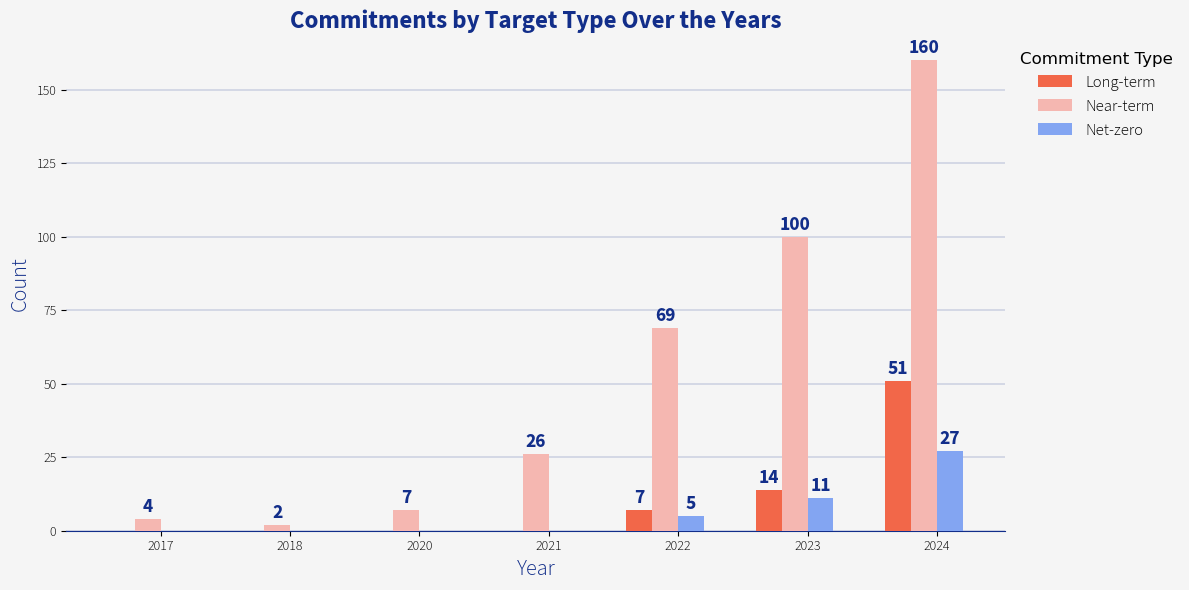

In [42]:
# Pivot the data to get the structure for grouped bar plot
pivot_target = target.pivot(index="Comitted year", columns="target", values="count").fillna(0)

# Extract years and categories
years = pivot_target.index.tolist()  # Years (2017, 2018, ...)
categories = pivot_target.columns.tolist()  # "Near-term", "Long-term", "Net-zero"

# Set bar width and positions
bar_width = 0.2  # Adjust bar width for spacing
x = np.arange(len(years))  # X positions for the groups

# Visual identity
font_bold = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Bold.otf")
font_light = font_manager.FontProperties(fname="C:/Fonts/SourceSansPro-Light.otf")

# Plot background color and bar colors
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 6))  # Set fixed plot size (width, height)
ax.set_facecolor("#f5f5f5")

# Plot bars for each category
if len(categories) > len(sbt_palette):
    raise ValueError("sbt_palette must have at least as many colors as the number of categories.")

for i, category in enumerate(categories):
    ax.bar(
        x + i * bar_width - (bar_width * len(categories) / 2),  # Offset to group bars around years
        pivot_target[category], 
        width=bar_width, 
        label=category, 
        color=sbt_palette[i],  # Use custom palette
        zorder=3
    )

# Set labels, title, and ticks
ax.set_title("Commitments by Target Type Over the Years", 
             fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xticks(x)  # Align the tick positions with years
ax.set_xticklabels(years, fontproperties=font_light, fontsize=12)
ax.tick_params(axis='y', labelsize=20)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Plot bars for each category
for i, category in enumerate(categories):
    for x_pos, value in zip(x + i * bar_width - (bar_width * len(categories) / 2), pivot_target[category]):
        if value > 0:  # Only plot non-zero values
            ax.bar(
                x_pos, 
                value,   
                width=bar_width, 
                label=category if x_pos == x[0] else "",  # Avoid duplicate legend entries
                color=sbt_palette[i],  # Use custom palette
                zorder=3
            )
            # Add data labels inside the bars
            ax.text(x_pos, value + 1, f'{value:.0f}', ha='center', va='bottom', fontsize=14, color="#122E8A", fontproperties=font_bold)

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Add legend
ax.legend(
    title="Commitment Type", 
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    frameon=False, 
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

In [43]:
# Calculate the percentage for each row
target['percentage'] = (
    target['count'] / target.groupby('Comitted year')['count'].transform('sum') * 100
).round().astype(int)

# Add a '%' sign to the percentage column
target['percentage'] = target['percentage'].astype(str) + '%'

print(target)

    Comitted year     target  count percentage
0            2017  Near-term      4       100%
1            2018  Near-term      2       100%
2            2020  Near-term      7       100%
3            2021  Near-term     26       100%
4            2022  Long-term      7         9%
5            2022  Near-term     69        85%
6            2022   Net-zero      5         6%
7            2023  Long-term     14        11%
8            2023  Near-term    100        80%
9            2023   Net-zero     11         9%
10           2024  Long-term     51        21%
11           2024  Near-term    160        67%
12           2024   Net-zero     27        11%


In [44]:
# Calculate the total count across all years
total_sum = target["count"].sum()

# Calculate percentage for each row
target["Percentage_all"] = (target["count"] / total_sum) * 100

# Select and display relevant columns
target_all = target[["Comitted year", "target", "Percentage_all"]]

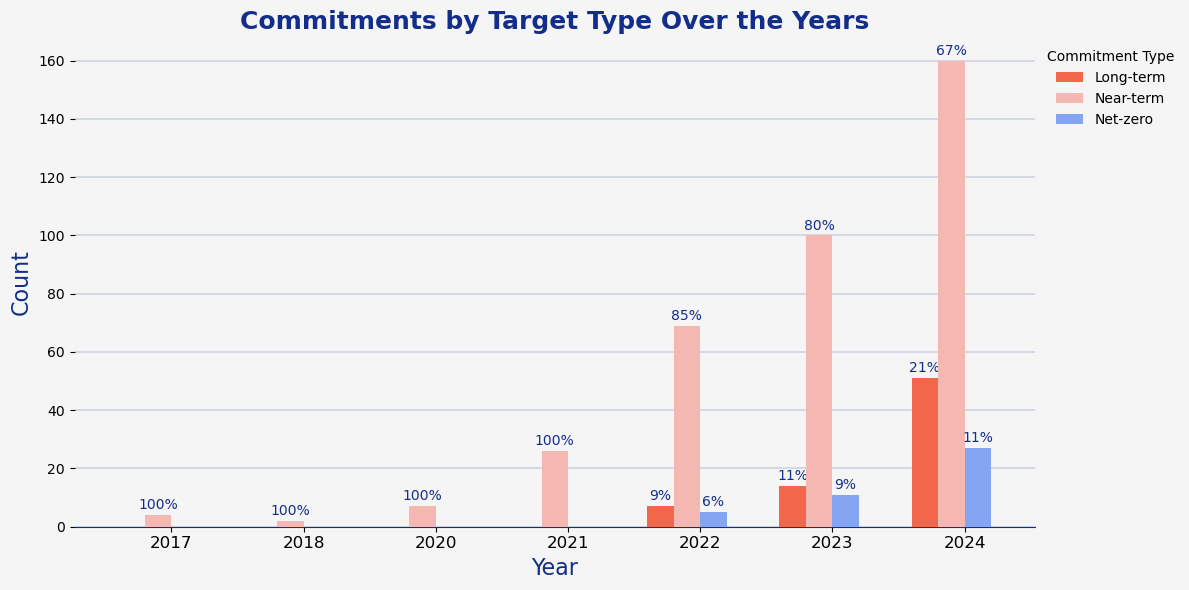

In [47]:

# Pivot the data for counts and percentages
pivot_count = target.pivot(index="Comitted year", columns="target", values="count").fillna(0)
pivot_percentage = target.pivot(index="Comitted year", columns="target", values="percentage").fillna("0%")

# Extract years and categories
years = pivot_count.index.tolist()
categories = pivot_count.columns.tolist()

# Set bar width and positions
bar_width = 0.2
x = np.arange(len(years))

# Plot background color and bar colors
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 6))
ax.set_facecolor("#f5f5f5")

# Plot bars for each category
for i, category in enumerate(categories):
    # Bar positions and heights
    x_positions = x + i * bar_width - (bar_width * len(categories) / 2)
    bar_heights = pivot_count[category]
    
    # Plot bars
    ax.bar(
        x_positions, 
        bar_heights, 
        width=bar_width, 
        label=category, 
        color=sbt_palette[i],
        zorder=3
    )
    
    # Add percentage data labels
    for x_pos, count, pct in zip(x_positions, bar_heights, pivot_percentage[category]):
        if count > 0:  # Only add labels for non-zero bars
            ax.text(x_pos, count + 1, pct, ha='center', va='bottom', fontsize=10, color="#122E8A")

# Set labels, title, and ticks
ax.set_title("Commitments by Target Type Over the Years", fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontsize=16, color="#122E8A")
ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12)

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Add legend
ax.legend(title="Commitment Type", loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

plt.tight_layout()
plt.show()

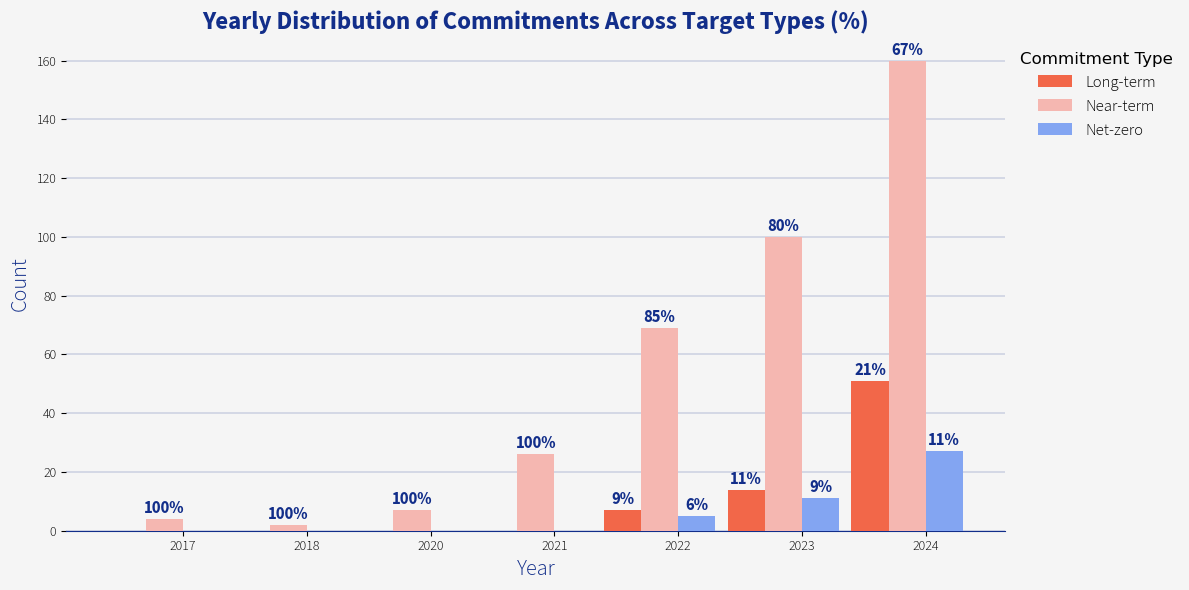

In [49]:
# Pivot the data for counts and percentages
pivot_count = target.pivot(index="Comitted year", columns="target", values="count").fillna(0)
pivot_percentage = target.pivot(index="Comitted year", columns="target", values="percentage").fillna("0%")

# Extract years and categories
years = pivot_count.index.tolist()
categories = pivot_count.columns.tolist()

# Set bar width and positions
bar_width = 0.3
x = np.arange(len(years))

# Custom palette (adjust this to match your visual identity)
category_colors = dict(zip(categories, sbt_palette))  # Map categories to colors


# Plot background color and bar colors
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 6))
ax.set_facecolor("#f5f5f5")

# Plot bars for each category
for i, category in enumerate(categories):
    # Bar positions and heights
    x_positions = x + i * bar_width - (bar_width * len(categories) / 2)
    bar_heights = pivot_count[category]
    
    # Plot bars
    ax.bar(
        x_positions,
        bar_heights,
        width=bar_width,
        label=category,
        color=category_colors[category],
        zorder=3
    )
    
    # Add percentage data labels
    for x_pos, count, pct in zip(x_positions, bar_heights, pivot_percentage[category]):
        if count > 0:  # Only add labels for non-zero bars
            ax.text(
                x_pos,
                count + 1,
                pct,
                ha='center',
                va='bottom',
                fontsize=12,
                color="#122E8A",
                fontproperties=font_bold
            )

# Set labels, title, and ticks
ax.set_title(
    "Yearly Distribution of Commitments Across Target Types (%)",
    fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A"
)
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xticks(x)
ax.set_xticklabels(years, fontproperties=font_light, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Add legend
ax.legend(
    title="Commitment Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

# Polynomial regression

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Grouping by target
predictions = {}

for target_name in target["target"].unique():
    # Filter data for the specific target
    subset = target[target["target"] == target_name]
    
    # Prepare data for regression
    X = np.array(subset["Comitted year"]).reshape(-1, 1)
    y = np.array(subset["count"])
    
    # Polynomial regression
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict for 2025
    X_2025 = poly.transform([[2025]])
    prediction_2025 = model.predict(X_2025)[0]
    predictions[target_name] = prediction_2025



In [52]:
prediction_rows = []

for target_name, prediction_2025 in predictions.items():
    prediction_rows.append({
        "Comitted year": 2025,
        "target": target_name,
        "count": prediction_2025,
        "percentage": None,  # You can leave this as None or assign a default value
        "Percentage_all": None  # You can leave this as None or assign a default value
    })

# Convert the prediction rows to a DataFrame
prediction_df = pd.DataFrame(prediction_rows)

# Append the new rows to the original target DataFrame
pred = pd.concat([target, prediction_df], ignore_index=True)
pred

# Print the updated DataFrame
print(pred)

    Comitted year     target       count percentage  Percentage_all
0            2017  Near-term    4.000000       100%        0.828157
1            2018  Near-term    2.000000       100%        0.414079
2            2020  Near-term    7.000000       100%        1.449275
3            2021  Near-term   26.000000       100%        5.383023
4            2022  Long-term    7.000000         9%        1.449275
5            2022  Near-term   69.000000        85%       14.285714
6            2022   Net-zero    5.000000         6%        1.035197
7            2023  Long-term   14.000000        11%        2.898551
8            2023  Near-term  100.000000        80%       20.703934
9            2023   Net-zero   11.000000         9%        2.277433
10           2024  Long-term   51.000000        21%       10.559006
11           2024  Near-term  160.000000        67%       33.126294
12           2024   Net-zero   27.000000        11%        5.590062
13           2025  Near-term  222.026578       N

C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_28156\2966695790.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [53]:
# Select relevant columns from pred
predictions = pred[['Comitted year','target', 'count']].copy()

# Calculate the percentage for each row
predictions['percentage'] = (predictions['count'] / predictions.groupby('Comitted year')['count'].transform('sum') * 100).round().astype(int)

# Add a '%' sign to the percentage column (optional)
predictions['percentage_str'] = predictions['percentage'].astype(str) + '%'
predplot=predictions.copy()

print(predplot)

    Comitted year     target       count  percentage percentage_str
0            2017  Near-term    4.000000         100           100%
1            2018  Near-term    2.000000         100           100%
2            2020  Near-term    7.000000         100           100%
3            2021  Near-term   26.000000         100           100%
4            2022  Long-term    7.000000           9             9%
5            2022  Near-term   69.000000          85            85%
6            2022   Net-zero    5.000000           6             6%
7            2023  Long-term   14.000000          11            11%
8            2023  Near-term  100.000000          80            80%
9            2023   Net-zero   11.000000           9             9%
10           2024  Long-term   51.000000          21            21%
11           2024  Near-term  160.000000          67            67%
12           2024   Net-zero   27.000000          11            11%
13           2025  Near-term  222.026578        

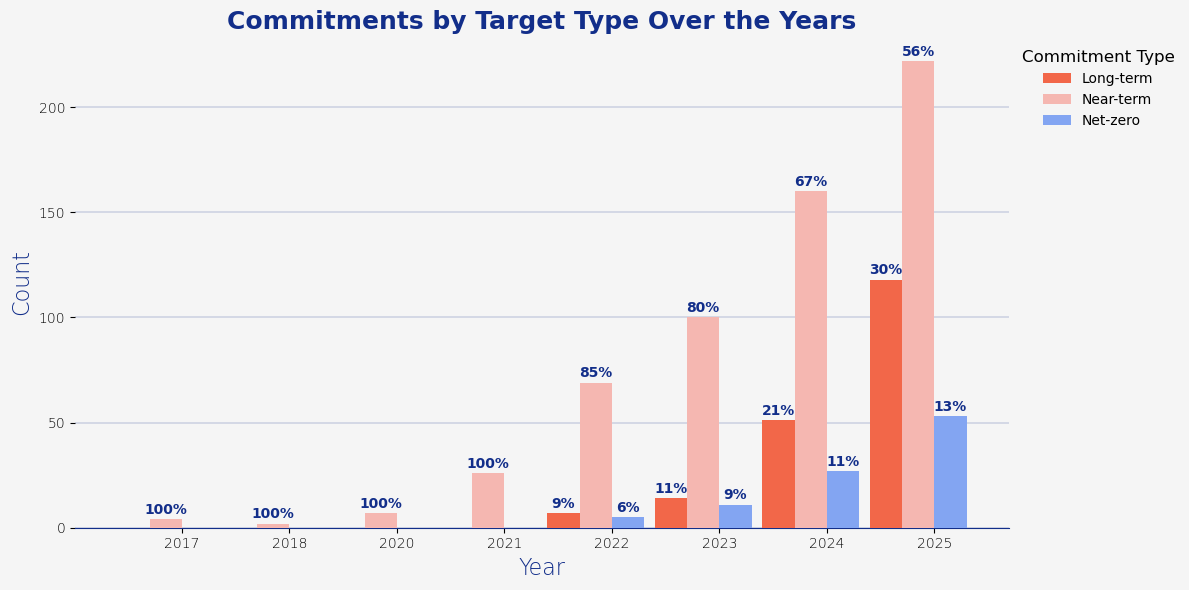

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbt
from matplotlib import font_manager


# Pivot the data for counts and percentages
pivot_count = predplot.pivot(index="Comitted year", columns="target", values="count").fillna(0)
pivot_percentage = predplot.pivot(index="Comitted year", columns="target", values="percentage_str").fillna("0%")

# Extract years and categories
years = pivot_count.index.tolist()
categories = pivot_count.columns.tolist()

# Set bar width and positions
bar_width = 0.3
x = np.arange(len(years))

# Custom palette (adjust this to match your visual identity)
category_colors = dict(zip(categories, sbt_palette))  # Map categories to colors

# Load custom fonts (modify paths if needed)
font_bold = font_manager.FontProperties(weight='bold')
font_light = font_manager.FontProperties(weight='light')
font_legend = font_manager.FontProperties(size=10)

# Plot background color and bar colors
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 6))
ax.set_facecolor("#f5f5f5")

# Plot bars for each category
for i, category in enumerate(categories):
    # Bar positions and heights
    x_positions = x + i * bar_width - (bar_width * len(categories) / 2)
    bar_heights = pivot_count[category]
    
    # Plot bars
    ax.bar(
        x_positions,
        bar_heights,
        width=bar_width,
        label=category,
        color=category_colors[category],
        zorder=3
    )
    
    # Add percentage data labels
    for x_pos, count, pct in zip(x_positions, bar_heights, pivot_percentage[category]):
        if count > 0:  # Only add labels for non-zero bars
            ax.text(
                x_pos,
                count + 1,
                pct,
                ha='center',
                va='bottom',
                fontsize=10,
                color="#122E8A",
                fontproperties=font_bold
            )

# Set labels, title, and ticks
ax.set_title(
    "Commitments by Target Type Over the Years",
    fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A"
)
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xticks(x)
ax.set_xticklabels(years, fontproperties=font_light, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Add legend
ax.legend(
    title="Commitment Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

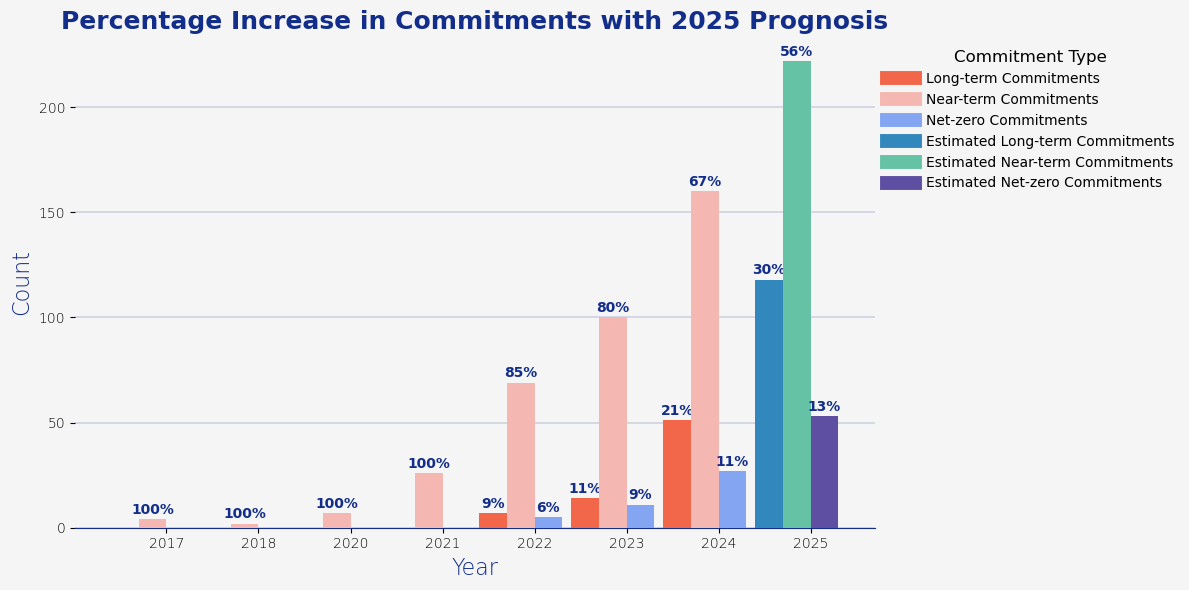

In [59]:
# Pivot the data for counts and percentages
pivot_count = predplot.pivot(index="Comitted year", columns="target", values="count").fillna(0)
# Replace "pct_increase" with "percentage_str" as it contains percentage data
pivot_percentage = predplot.pivot(index="Comitted year", columns="target", values="percentage_str").fillna("0%")

# Extract years and categories
years = pivot_count.index.tolist()
categories = pivot_count.columns.tolist()

# Set bar width and positions
bar_width = 0.3
x = np.arange(len(years))

# Custom palette
#sbt_palette = sbt.color_palette("pastel", len(categories))
category_colors = dict(zip(categories, sbt_palette))

# Add custom colors for the year 2025
custom_2025_colors = {
    "Near-term": "#66c2a5",  # Greenish
    "Long-term": "#3288bd",  # Bluish
    "Net-zero": "#5e4fa2"    # Purple-blue
}

# Plot background color and bar colors
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(12, 6))
ax.set_facecolor("#f5f5f5")

# Plot bars for each category
for i, category in enumerate(categories):
    # Bar positions and heights
    x_positions = x + i * bar_width - (bar_width * len(categories) / 2)
    bar_heights = pivot_count[category]

    # Define custom colors for bars (use custom colors for 2025, default colors otherwise)
    bar_colors = [
        custom_2025_colors[category] if year == 2025 else category_colors[category]
        for year in years
    ]

    # Plot bars
    ax.bar(
        x_positions,
        bar_heights,
        width=bar_width,
        label=f"{category}" if category in custom_2025_colors else category,
        color=bar_colors,
        zorder=3
    )

    # Add percentage data labels
    for x_pos, count, pct, year in zip(x_positions, bar_heights, pivot_percentage[category], years):
        if count > 0:  # Only add labels for non-zero bars
            ax.text(
                x_pos,
                count + 1,
                pct,
                ha="center",
                va="bottom",
                fontsize=10,
                color="#122E8A",
                fontproperties=font_bold
            )

# Set labels, title, and ticks
ax.set_title(
    "Percentage Increase in Commitments with 2025 Prognosis",
    fontproperties=font_bold, fontsize=18, fontweight="bold", color="#122E8A"
)
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xticks(x)
ax.set_xticklabels(years, fontproperties=font_light, fontsize=12)
ax.tick_params(axis="y", labelsize=12)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Spines and grid
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color("#122E8A")
ax.yaxis.grid(True, linestyle="-", linewidth=0.2, color="#122E8A", zorder=0)


# Add legend (manual labels)
custom_legend_labels = [
    ("Long-term Commitments", "#F26749"),  # Greenish
    ("Near-term Commitments", "#F5B7B1"),  # Bluish
    ("Net-zero Commitments", "#83A5F2"),  
    ("Estimated Long-term Commitments", "#3288bd"),  # blueish
    ("Estimated Near-term Commitments", "#66c2a5"),  # Greenish
    ("Estimated Net-zero Commitments", "#5e4fa2")    # Purple-blue
]
custom_handles = [
    plt.Line2D([0], [0], color=color, lw=10, label=label)
    for label, color in custom_legend_labels
]
# Add legend
ax.legend(
    handles=custom_handles,
    title="Commitment Type",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    frameon=False,
    prop=font_legend,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

# prep of 


In [ ]:
goal=Targ_dk[['sectorCat', 'target','target_value','target_year', 'Comitted year']].reset_index(drop=True)

In [ ]:
# Function to filter out rows containing letters (except %)
def filter_values(value):
    if pd.isna(value):  # Retain NaN values
        return value
    if '%' in value:  # Retain values with % symbol
        return value
    # Remove values containing letters
    if any(c.isalpha() for c in value):
        return np.nan
    return value

goal['target_value'] = goal['target_value'].apply(filter_values)
goal['target_value'].unique()

# Function to process the values
def convert_to_pct(value):
    if pd.isna(value):
        return value  # Keep NaN as is
    value = str(value).replace(',', '.')  # Replace commas with dots for decimal compatibility
    if '%' in value:
        # Remove decimals and return integer percentage
        return f"{int(float(value.strip('%')))}%"
    else:
        try:
            # Convert numeric values to percentages (multiply by 100)
            return f"{int(float(value) * 100)}%"
        except ValueError:
            return np.nan  # Handle invalid values gracefully
        
goal['target_value'] = goal['target_value'].apply(convert_to_pct)

near_goal=goal[goal['target'] == 'Near-term']
long_goal=goal[goal['target'] == 'Long-term']

In [ ]:
goaldef=goal[goal['target'] != 'Net-zero']


C:\Users\AnjaBrocklehurst\AppData\Local\Temp\ipykernel_6836\3002530593.py:5: UserWarning:

The palette list has more values (25) than needed (2), which may not be intended.



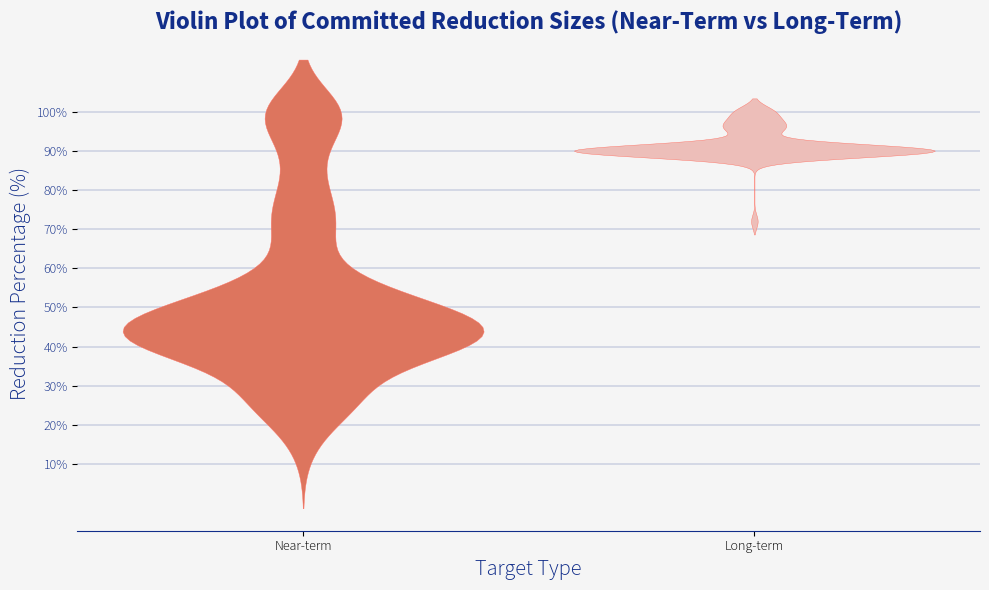

In [ ]:
#plot background color and bar colors
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(10, 6))  # Set fixed plot size (width, height)

# Violin Plot
sns.violinplot(
    x="target", 
    y="target_value", 
    hue="target", 
    data=goaldef, 
    ax=ax, 
    zorder=3, 
    palette=sbt_palette, 
    legend=False, 
    linewidth=0.3,  # Removes the black outline
)
ax.set_facecolor("#f5f5f5")  # Match plot background color

for violin in ax.collections:
    violin.set_edgecolor("#FF6F61")

# Set title with font properties
ax.set_title("Violin Plot of Committed Reduction Sizes (Near-Term vs Long-Term)", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_xlabel("Target Type", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_ylabel("Reduction Percentage (%)", fontproperties=font_light, fontsize=16, color="#122E8A")

# Define custom y-ticks and labels
yticks_positions = np.arange(10, 101, 10)  # Tick positions: 10, 20, ..., 100
yticks_labels = [f"{i}%" for i in yticks_positions]  # Labels: "10%", "20%", ..., "100%"
ax.set_yticks(yticks_positions)
ax.set_yticklabels(yticks_labels, fontsize=10, color="#122E8A", fontproperties=font_light)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Style x-axis labels
for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)

# Style y-axis labels
for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

plt.tight_layout()
plt.show()

In [ ]:
goal['timeframe'] = goal['target_year']- goal['Comitted year']

In [ ]:
goal24=goal[goal['Comitted year'] == 2024]
goal23=goal[goal['Comitted year'] == 2023]
goal22=goal[goal['Comitted year'] == 2022]

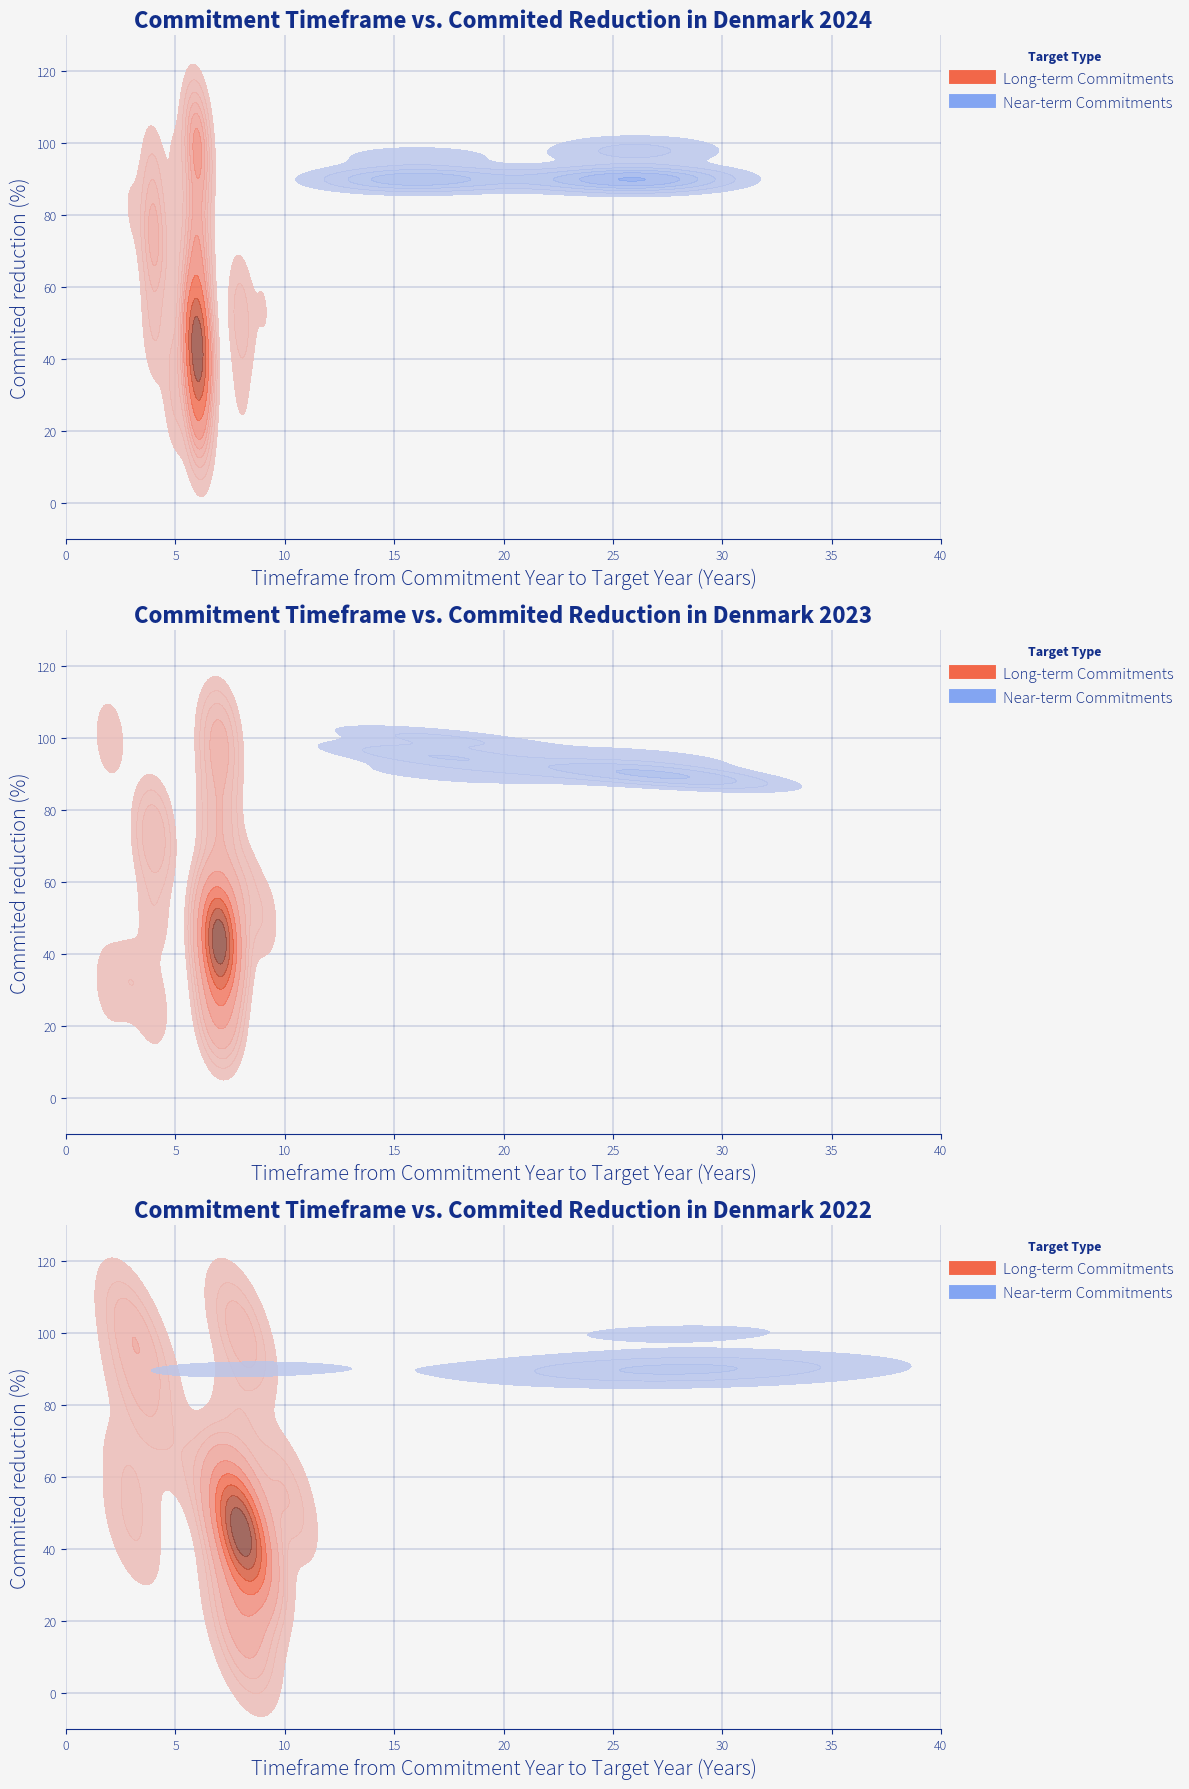

In [ ]:

# Assuming goal24, goal23, and goal22 are already loaded as DataFrames
goal24 = goal24.dropna(subset=["target_value"])
goal23 = goal23.dropna(subset=["target_value"])
goal22 = goal22.dropna(subset=["target_value"])

# Color map for the KDE plots
color_map = {
    "Near-term": "#F26749",  # Crab
    "Long-term": "#83A5F2",  # Greenish 
}

# Create the subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), facecolor="#f5f5f5")  # 3 rows, 1 column, with shared background

datasets = [goal24, goal23, goal22]
titles = ["Commitment Timeframe vs. Commited Reduction in Denmark 2024", "Commitment Timeframe vs. Commited Reduction in Denmark 2023", "Commitment Timeframe vs. Commited Reduction in Denmark 2022"]

# Legend settings
custom_legend_labels = [
    ("Long-term Commitments", "#F26749"),  # Crab
    ("Near-term Commitments", "#83A5F2"),  # Vista Blue
]
custom_handles = [
    plt.Line2D([0], [0], color=color, lw=10, label=label)
    for label, color in custom_legend_labels
]

for i, (goal, title) in enumerate(zip(datasets, titles)):
    ax = axes[i]
    
    # KDE Plot for each dataset
    sns.kdeplot(
        data=goal,
        x="timeframe",
        y="target_value",
        hue="target",
        fill=True,
        palette=color_map,
        alpha=0.8,
        ax=ax,
        zorder=3  # Ensure KDE plot is above the grid
    )
    
    # Set axis background color
    ax.set_facecolor("#f5f5f5")
    
    # Title and labels with font properties
    ax.set_title(
        title,
        fontproperties=font_bold,
        fontsize=18,
        fontweight='bold',
        color="#122E8A"
    )
    ax.set_xlabel("Timeframe from Commitment Year to Target Year (Years)", fontproperties=font_light, fontsize=16, color="#122E8A")
    ax.set_ylabel("Commited reduction (%)", fontproperties=font_light, fontsize=16, color="#122E8A")
    
    # Set the same x and y axis limits for all subplots
    ax.set_xlim(0 , 40)
    ax.set_ylim(-10, 130)

    # Customize ticks
    ax.tick_params(axis='x', labelsize=12, colors="#122E8A")
    ax.tick_params(axis='y', labelsize=12, colors="#122E8A")
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_light)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_light)
    
    # Add legend to each subplot
    legend = ax.legend(
        handles=custom_handles,
        title="Target Type",
        loc="upper left",
        bbox_to_anchor=(1, 1),
        frameon=False,
        prop=font_legend,
        title_fontsize=12
    )
    plt.setp(legend.get_texts(), color="#122E8A")  # Customize legend text color
    plt.setp(legend.get_title(), fontproperties=font_bold, color="#122E8A")  # Customize legend title font
    
    # Grid and spines
    ax.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color("#122E8A")

# Adjust layout for the subplots
plt.tight_layout()
plt.show()

# **Retracted Companies**